In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
#Check for Duplicated Values
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.shape

(5169, 2)

# EDA

([<matplotlib.patches.Wedge at 0x7df89f2ccaf0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.1067270163085225, -0.4638483711007676, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37%'),
  Text(0.6455907595133047, -0.2705782164754477, '12.63%')])

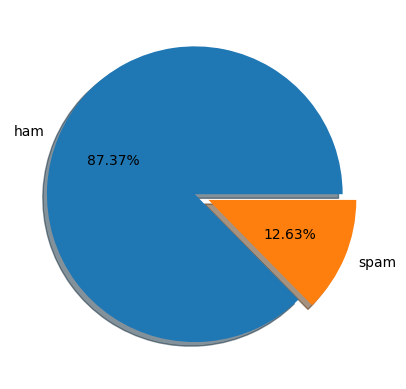

In [15]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%', shadow=True, explode=[0, 0.1])


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([
    ('count', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
pipe.score(X_test, y_test)

0.9854932301740812

In [20]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [21]:
confusion_matrix(y_test, y_pred)

array([[887,   2],
       [ 13, 132]])

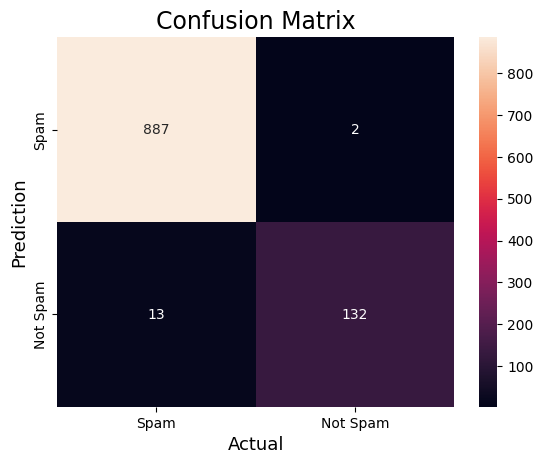

In [22]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [25]:
emails=[
    df['message'][220]
]

In [26]:
pipe.predict(emails)

array([0])

In [27]:
# Save the model
import pickle
with open('spam.pickle', 'wb') as f:
    pickle.dump(pipe, f)

In [29]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [30]:
import streamlit as st
import pickle

# Load the saved model
model = pickle.load(open('/content/spam.pickle', 'rb'))

# MAIN FUNCTION #


title = "Email Spam classification App".upper()
st.markdown("<h1 style='text-align: center; font-size: 65px; color: #4682B4;'>{}</h1>".format(title),
            unsafe_allow_html=True)

info = ''

with st.expander("1. Check if your text is a spam or ham 😀"):
    text_message = st.text_input("Please enter your message")
    if st.button("Predict"):
        prediction = model.predict([text_message])[0]

        if (prediction == 0):
            info = 'Not Spam'
            st.success('Prediction: {}'.format(info))

        else:
            info = 'Spam'
            st.error('Prediction: {}'.format(info))

2023-08-21 05:54:41.771 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
